# AA Tau Figures for the Paper

Quick Links:

* [Spectra, Dec02](#spectra02)
* [Spectra, Dec12](#spectra12)
* [Color-color/mag, subset](#colorcolorsub)
* [Color-color/mag, all](#colorcolorall)
* [](#)
* [](#)
* [](#)


In [33]:
import numpy as np
import tarfile
import matplotlib.pyplot as plt
import scipy.interpolate as interp
from sys import platform
from astropy.io import fits
from astropy.io import ascii
from astropy import units as u
import astropy.table as Table
from astropy.table import QTable
from dust_extinction.parameter_averages import F99

In [34]:
# %matplotlib notebook  
%matplotlib inline

Read in data files reduced by earlier notebook:

In [35]:
data1 = ascii.read('AATau_IR2008.txt')
data2 = ascii.read('AATau_opt2008.txt')
data = Table.vstack([data2, data1])
allwav_2008=data['wavelength']
alldata_2008=data['flux']

data1 = ascii.read('AATau_IR2014dec02.txt')
data2 = ascii.read('AATau_opt2014dec02.txt')
data = Table.vstack([data2, data1])
allwav_dec02=data['wavelength']
alldata_dec02=data['flux']

data1 = ascii.read('AATau_IR2014dec12.txt')
data2 = ascii.read('AATau_opt2014dec12.txt')
data = Table.vstack([data2, data1])
allwav_dec12=data['wavelength']
alldata_dec12=data['flux']

Make an interpolation function to divide one spectrum by the other:

In [36]:
interp2008=interp.interp1d(allwav_2008,alldata_2008)

# Figure: Spectra, Dec 02 <a name="spectra02"></a>

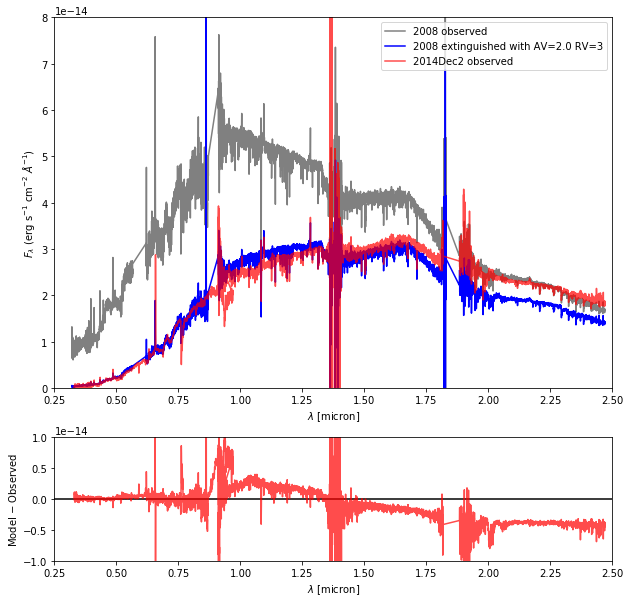

In [37]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,10),gridspec_kw = {'height_ratios':[3, 1]})

ext=F99(Rv=3.0)

ax1.plot(allwav_2008,alldata_2008,'grey',label='2008 observed')
ax1.plot(allwav_2008,alldata_2008*ext.extinguish(allwav_2008,Av=2.0),'blue',
         label="2008 extinguished with AV=2.0 RV=3")
ax1.plot(allwav_dec02,alldata_dec02,'red',label='2014Dec2 observed',alpha=0.7)
ax1.set_ylim(0,0.8E-13)
ax1.set_xlim(0.25,2.5)
ax1.set_xlabel('$\lambda$ [micron]')
ax1.set_ylabel('$F_\lambda$ (erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$)')
ax1.legend(loc='upper right')

ax2.plot([.25,2.5],[0,0],'k')
ax2.plot(allwav_dec02,
         interp2008(allwav_dec02)*alldata_2008.unit*ext.extinguish(allwav_dec02,Av=2.0)
         -alldata_dec02,'r',alpha=0.7)
ax2.set_xlim(0.25,2.5)
ax2.set_ylim(-1E-14,1E-14)
ax2.set_xlabel('$\lambda$ [micron]')
ax2.set_ylabel('Model $-$ Observed')

plt.show()

# Figure: Spectra, Dec 12 <a name="spectra12"></a>

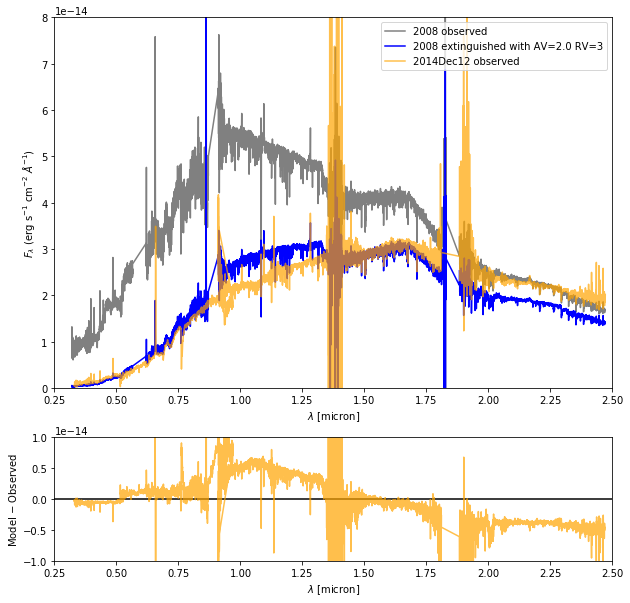

In [38]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(10,10),gridspec_kw = {'height_ratios':[3, 1]})

ext=F99(Rv=3.0)

ax1.plot(allwav_2008,alldata_2008,'grey',label='2008 observed')
ax1.plot(allwav_2008,alldata_2008*ext.extinguish(allwav_2008,Av=2.0),'blue',
         label="2008 extinguished with AV=2.0 RV=3")
ax1.plot(allwav_dec12,alldata_dec12,'orange',label='2014Dec12 observed',alpha=0.7)
ax1.set_ylim(0,0.8E-13)
ax1.set_xlim(0.25,2.5)
ax1.set_xlabel('$\lambda$ [micron]')
ax1.set_ylabel('$F_\lambda$ (erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$)')
ax1.legend(loc='upper right')

allwav_dec12clip = allwav_dec12[allwav_dec12<2.47*u.micron]
alldata_dec12clip= alldata_dec12[allwav_dec12<2.47*u.micron]

ax2.plot([.25,2.5],[0,0],'k')
ax2.plot(allwav_dec12clip,
         interp2008(allwav_dec12clip)*alldata_2008.unit*ext.extinguish(allwav_dec12clip,Av=2.0)
         -alldata_dec12clip,'orange',alpha=0.7)
ax2.set_xlim(0.25,2.5)
ax2.set_ylim(-1E-14,1E-14)
ax2.set_xlabel('$\lambda$ [micron]')
ax2.set_ylabel('Model $-$ Observed')

plt.show()

# Figure: Color-color/mag plots subset <a name="colorcolorsub"></a>

In [39]:
# Copied from AATau_photometry
mags1=np.array([ 8.12545762,  8.63775381,  9.4796061 , 10.54233954, 11.57235532,
       12.84902046, 13.99366631])
mags2=np.array([ 8.1190166 ,  8.90018651, 10.03621318, 11.49856709, 12.84199828,
       14.84816432, 16.58947888])
mags3=np.array([ 8.11189694,  8.92168367, 10.07173608, 11.61187158, 12.95395126,
       14.94780733, 16.18287054])
mags1ext=np.array([[ 8.34920393,  8.98590141,  9.99722394, 11.32340427, 12.6551131 ,
        14.65587901, 16.74044124],
       [ 8.34196653,  8.96827834,  9.9944421 , 11.41831284, 12.82419083,
        14.72582521, 16.50511259],
       [ 8.33616823,  8.95416742,  9.9921507 , 11.49314381, 12.95895849,
        14.77624733, 16.3072267 ],
       [ 8.5726541 ,  9.33342211, 10.51339964, 12.09452271, 13.7034493 ,
        16.38573996, 19.36822833],
       [ 8.55824921,  9.29820724, 10.50705777, 12.27498226, 14.03625984,
        16.56566564, 18.96291505],
       [ 8.54670183,  9.27000966, 10.50173639, 12.41498897, 14.30036294,
        16.68845579, 18.6013921 ]])

In [40]:
bands=['K','H','J','I','R','V','B']

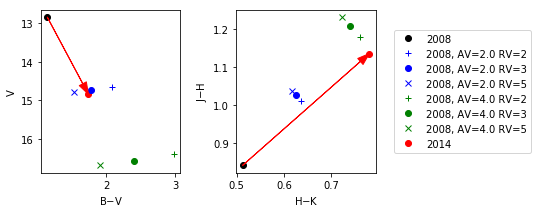

In [41]:
fig,axes=plt.subplots(1,2,figsize=(6,3))

j=5
axes[0].plot(mags1[j+1]-mags1[j],mags1[j],'o',color='black')
axes[0].plot(mags2[j+1]-mags2[j],mags2[j],'o',color='red')
axes[0].annotate("",xy=(mags2[j+1]-mags2[j],mags2[j]), xycoords='data',
    xytext=(mags1[j+1]-mags1[j],mags1[j]),textcoords='data',
    arrowprops=dict(color='red',headwidth=8,headlength=12,width=0.1))
axes[0].set_xlabel(bands[j+1]+'$-$'+bands[j])
axes[0].set_ylabel(bands[j])

axes[0].plot(mags1ext[0,j+1]-mags1ext[0,j],mags1ext[0,j],'+',color='blue')
axes[0].plot(mags1ext[1,j+1]-mags1ext[1,j],mags1ext[1,j],'o',color='blue')
axes[0].plot(mags1ext[2,j+1]-mags1ext[2,j],mags1ext[2,j],'x',color='blue')
axes[0].plot(mags1ext[3,j+1]-mags1ext[3,j],mags1ext[3,j],'+',color='green')
axes[0].plot(mags1ext[4,j+1]-mags1ext[4,j],mags1ext[4,j],'o',color='green')
axes[0].plot(mags1ext[5,j+1]-mags1ext[5,j],mags1ext[5,j],'x',color='green')

j=0     
axes[1].annotate("",xy=(mags2[j+1]-mags2[j],mags2[j+2]-mags2[j+1]), xycoords='data',
    xytext=(mags1[j+1]-mags1[j],mags1[j+2]-mags1[j+1]),textcoords='data',
    arrowprops=dict(color='red',headwidth=8,headlength=12,width=0.1))
axes[1].plot(mags1[j+1]-mags1[j],mags1[j+2]-mags1[j+1],'o',color='black',label='2008')
axes[1].set_xlabel(bands[j+1]+'$-$'+bands[j])
axes[1].set_ylabel(bands[j+2]+'$-$'+bands[j+1])

axes[1].plot(mags1ext[0,j+1]-mags1ext[0,j],mags1ext[0,j+2]-mags1ext[0,j+1],'+',color='blue',label='2008, AV=2.0 RV=2')
axes[1].plot(mags1ext[1,j+1]-mags1ext[1,j],mags1ext[1,j+2]-mags1ext[1,j+1],'o',color='blue',label='2008, AV=2.0 RV=3')
axes[1].plot(mags1ext[2,j+1]-mags1ext[2,j],mags1ext[2,j+2]-mags1ext[2,j+1],'x',color='blue',label='2008, AV=2.0 RV=5')
axes[1].plot(mags1ext[3,j+1]-mags1ext[3,j],mags1ext[3,j+2]-mags1ext[3,j+1],'+',color='green',label='2008, AV=4.0 RV=2')
axes[1].plot(mags1ext[4,j+1]-mags1ext[4,j],mags1ext[4,j+2]-mags1ext[4,j+1],'o',color='green',label='2008, AV=4.0 RV=3')
axes[1].plot(mags1ext[5,j+1]-mags1ext[5,j],mags1ext[5,j+2]-mags1ext[5,j+1],'x',color='green',label='2008, AV=4.0 RV=5')

axes[1].plot(mags2[j+1]-mags2[j],mags2[j+2]-mags2[j+1],'o',color='red',label='2014')  

fig.subplots_adjust(wspace=0.4)
axes[1].legend(loc='center right', bbox_to_anchor=(2.15, 0.5))

axes[0].set_ylim(axes[0].get_ylim()[::-1])

plt.show()

# Figure: Color-color/mag plots, all <a name="colorcolorall"></a>

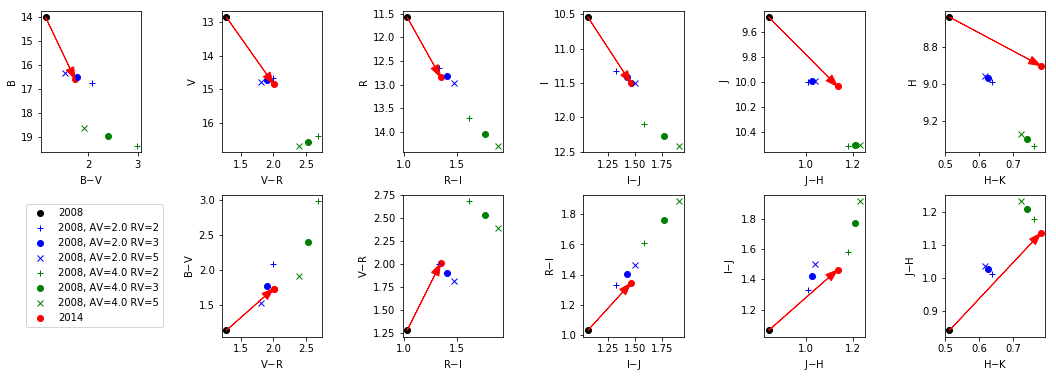

In [42]:
fig,axes=plt.subplots(2,6,figsize=(18,6))

for j in [0,1,2,3,4,5]: # just data
    if j!=5:
        axes[1,5-j].plot(mags2[j+1]-mags2[j],mags2[j+2]-mags2[j+1],'o',color='red')
        
        axes[1,5-j].annotate("",xy=(mags2[j+1]-mags2[j],mags2[j+2]-mags2[j+1]), xycoords='data',
            xytext=(mags1[j+1]-mags1[j],mags1[j+2]-mags1[j+1]),textcoords='data',
            arrowprops=dict(color='red',headwidth=8,headlength=12,width=0.1))
        
        axes[1,5-j].plot(mags1[j+1]-mags1[j],mags1[j+2]-mags1[j+1],'o',color='black',label='2008')
        axes[1,5-j].set_xlabel(bands[j+1]+'$-$'+bands[j])
        axes[1,5-j].set_ylabel(bands[j+2]+'$-$'+bands[j+1])
                           
    axes[0,5-j].plot(mags1[j+1]-mags1[j],mags1[j+1],'o',color='black')
    axes[0,5-j].plot(mags2[j+1]-mags2[j],mags2[j+1],'o',color='red')
    axes[0,5-j].annotate("",xy=(mags2[j+1]-mags2[j],mags2[j+1]), xycoords='data',
            xytext=(mags1[j+1]-mags1[j],mags1[j+1]),textcoords='data',
            arrowprops=dict(color='red',headwidth=8,headlength=12,width=0.1))
    axes[0,5-j].set_xlabel(bands[j+1]+'$-$'+bands[j])
    axes[0,5-j].set_ylabel(bands[j+1])
    
for j in [0,1,2,3,4,5]: # extinction 
    if j!=5:
        axes[1,5-j].plot(mags1ext[0,j+1]-mags1ext[0,j],mags1ext[0,j+2]-mags1ext[0,j+1],'+',color='blue',label='2008, AV=2.0 RV=2')
        axes[1,5-j].plot(mags1ext[1,j+1]-mags1ext[1,j],mags1ext[1,j+2]-mags1ext[1,j+1],'o',color='blue',label='2008, AV=2.0 RV=3')
        axes[1,5-j].plot(mags1ext[2,j+1]-mags1ext[2,j],mags1ext[2,j+2]-mags1ext[2,j+1],'x',color='blue',label='2008, AV=2.0 RV=5')
        axes[1,5-j].plot(mags1ext[3,j+1]-mags1ext[3,j],mags1ext[3,j+2]-mags1ext[3,j+1],'+',color='green',label='2008, AV=4.0 RV=2')
        axes[1,5-j].plot(mags1ext[4,j+1]-mags1ext[4,j],mags1ext[4,j+2]-mags1ext[4,j+1],'o',color='green',label='2008, AV=4.0 RV=3')
        axes[1,5-j].plot(mags1ext[5,j+1]-mags1ext[5,j],mags1ext[5,j+2]-mags1ext[5,j+1],'x',color='green',label='2008, AV=4.0 RV=5')

    axes[0,5-j].plot(mags1ext[0,j+1]-mags1ext[0,j],mags1ext[0,j+1],'+',color='blue')
    axes[0,5-j].plot(mags1ext[1,j+1]-mags1ext[1,j],mags1ext[1,j+1],'o',color='blue')
    axes[0,5-j].plot(mags1ext[2,j+1]-mags1ext[2,j],mags1ext[2,j+1],'x',color='blue')
    axes[0,5-j].plot(mags1ext[3,j+1]-mags1ext[3,j],mags1ext[3,j+1],'+',color='green')
    axes[0,5-j].plot(mags1ext[4,j+1]-mags1ext[4,j],mags1ext[4,j+1],'o',color='green')
    axes[0,5-j].plot(mags1ext[5,j+1]-mags1ext[5,j],mags1ext[5,j+1],'x',color='green')
    
axes[1,1].plot(mags2[5]-mags2[4],mags2[6]-mags2[5],'o',color='red',label='2014') # just for the legend
axes[1,0].axis('off')
fig.subplots_adjust(wspace=0.8,hspace=0.3)
axes[1,1].legend(loc='center left', bbox_to_anchor=(-2, 0.5))
for j in [0,1,2,3,4,5]:
    axes[0,5-j].set_ylim(axes[0,5-j].get_ylim()[::-1])

plt.show()

# START HERE

# Figure: Just infrared, extinction and reddening with models

In [ ]:
CCM89 = de.CCM89(Rv=3.0)
O94 = de.O94(Rv=3.0)
F99 = de.F99(Rv=3.0)
F04 = de.F04(Rv=3.0)
GCC09_MWAvg = de.GCC09_MWAvg()
G16 = de.G16(RvA=3.0, fA=1.0)

wavelengths=allwav_dec02*u.micron

fig,axs=plt.subplots(3,2,sharex='col',sharey='row',figsize=(8,12))

def plotlaws(i):
    axs[i,0].plot(allwav_dec02,ext_dec02,'k',alpha=0.3)
    axs[i,0].plot(wavelengths, -2.5*np.log10(CCM89.extinguish(wavelengths, Av=2)),label='CCM89, Av=2')
    axs[i,0].plot(wavelengths, -2.5*np.log10(O94.extinguish(wavelengths, Av=2)),label='O94, Av=2')
    axs[i,0].plot(wavelengths, -2.5*np.log10(F99.extinguish(wavelengths, Av=2)),label='F99, Av=2')
    axs[i,0].plot(wavelengths, -2.5*np.log10(F04.extinguish(wavelengths, Av=2)),label='F04, Av=2')
    axs[i,0].plot(wavelengths, -2.5*np.log10(G16.extinguish(wavelengths, Av=2)),label='G16, Av=2')

    axs[i,1].plot(1./allwav_dec02,ext_dec02,'k',alpha=0.3)
    axs[i,1].plot(1./wavelengths, -2.5*np.log10(CCM89.extinguish(wavelengths, Av=2)),label='CCM89, Av=2')
    axs[i,1].plot(1./wavelengths, -2.5*np.log10(O94.extinguish(wavelengths, Av=2)),label='O94, Av=2')
    axs[i,1].plot(1./wavelengths, -2.5*np.log10(F99.extinguish(wavelengths, Av=2)),label='F99, Av=2')
    axs[i,1].plot(1./wavelengths, -2.5*np.log10(F04.extinguish(wavelengths, Av=2)),label='F04, Av=2')
    axs[i,1].plot(1./wavelengths, -2.5*np.log10(G16.extinguish(wavelengths, Av=2)),label='G16, Av=2')
    

plotlaws(1)
axs[1,0].plot(wavelengths, -2.5*np.log10(GCC09_MWAvg.extinguish(wavelengths, Av=2)),label='GCC09, Av=2')
axs[1,1].plot(1./wavelengths, -2.5*np.log10(GCC09_MWAvg.extinguish(wavelengths, Av=2)),label='GCC09, Av=2')
        
CCM89 = de.CCM89(Rv=2.0)
O94 = de.O94(Rv=2.0)
F99 = de.F99(Rv=2.0)
F04 = de.F04(Rv=2.0)
G16 = de.G16(RvA=2.0, fA=1.0)

plotlaws(0)

CCM89 = de.CCM89(Rv=5.0)
O94 = de.O94(Rv=5.0)
F99 = de.F99(Rv=5.0)
F04 = de.F04(Rv=5.0)
G16 = de.G16(RvA=5.0, fA=1.0)

plotlaws(2)

axs[0,0].set_ylabel('$A_\lambda$')
axs[1,0].set_ylabel('$A_\lambda$')
axs[2,0].set_ylabel('$A_\lambda$')
axs[0,0].set_ylim(-0.2,4)
axs[1,0].set_ylim(-0.2,4)
axs[2,0].set_ylim(-0.2,4)
axs[1,0].legend(loc='best')

axs[2,0].set_xlabel('$\lambda$ [micron]')
axs[2,1].set_xlabel('$\lambda^{-1}$ [micron$^{-1}$]')

axs[0,1].text(.5,3.5,'Rv=2',fontsize='13')
axs[1,1].text(.5,3.5,'Rv=3',fontsize='13')
axs[2,1].text(.5,3.5,'Rv=5',fontsize='13')

fig.subplots_adjust(hspace=0.05)
fig.subplots_adjust(wspace=0.03)


plt.show()

# From the veiling file:

NameError: name 'ext_dec02' is not defined

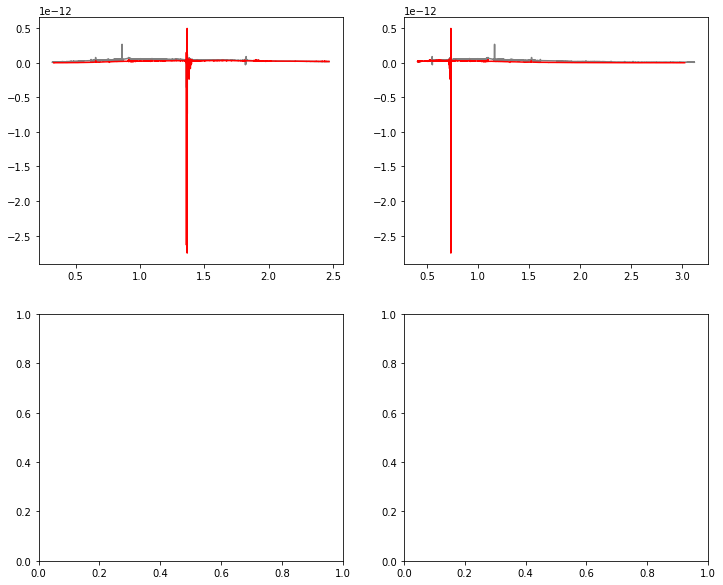

In [30]:
fig,axs=plt.subplots(2,2,figsize=(12,10))

axs[0,0].plot(allwav_2008,alldata_2008,'grey',label='2008 observed')
axs[0,0].plot(allwav_dec02,alldata_dec02,'red',label='02dec2014 observed')
axs[0,1].plot(1/allwav_2008,alldata_2008,'grey')
axs[0,1].plot(1/allwav_dec02,alldata_dec02,'red')



axs[1,0].plot(allwav_dec02,ext_dec02,'k',alpha=0.7,label='Flux ratio')
axs[1,1].plot(1./allwav_dec02,ext_dec02,'k',alpha=0.7)

for Rv,line in list(zip((2,3,5),('dotted','solid','dashed'))):
    ext=F99(Rv=Rv)
    axs[0,0].plot(allwav_2008,alldata_2008*10**(-0.4*2.0*ext(allwav_2008)),
                  'blue',linestyle=line,alpha=0.5,label='2008 with AV=2, RV='+str(Rv))
    axs[0,1].plot(1/allwav_2008,alldata_2008*10**(-0.4*2.0*ext(allwav_2008)),
                  'blue',linestyle=line,alpha=0.5,label='2008 with AV=2, RV='+str(Rv))
    axs[0,0].plot(allwav_2008,alldata_2008*10**(-0.4*4.0*ext(allwav_2008)),
                  'green',linestyle=line,alpha=0.5,label='2008 with AV=4, RV='+str(Rv))
    axs[0,1].plot(1/allwav_2008,alldata_2008*10**(-0.4*4.0*ext(allwav_2008)),
                  'green',linestyle=line,alpha=0.5,label='2008 with AV=4, RV='+str(Rv))

    
for Rv,line in list(zip((2,3,5),('dotted','solid','dashed'))):
    ext=F99(Rv=Rv)
    axs[1,0].plot(allwav_2008,2.0*ext(allwav_2008),'blue',linestyle=line,alpha=0.5,
                 label='2008 with AV=2, Rv='+str(Rv))
    axs[1,1].plot(1/allwav_2008,2.0*ext(allwav_2008),'blue',linestyle=line,alpha=0.5,
                 label='2008 with AV=2, Rv='+str(Rv))
    axs[1,0].plot(allwav_2008,4.0*ext(allwav_2008),'green',linestyle=line,alpha=0.5,
                 label='2008 with AV=2, Rv='+str(Rv))
    axs[1,1].plot(1/allwav_2008,4.0*ext(allwav_2008),'green',linestyle=line,alpha=0.5,
                 label='2008 with AV=2, Rv='+str(Rv))

axs[0,0].set_xlim(0.25,2.6)
axs[0,0].set_ylim(0,0.7E-13)
axs[0,0].set_ylabel('$F_\lambda$ (erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$)')
axs[0,0].legend(loc='best')
axs[0,1].set_xlim(0,3.2)
axs[0,1].set_ylim(0,0.7E-13)




axs[1,0].legend(loc='best')
axs[1,0].set_ylabel('$A_\lambda$')
axs[1,0].set_xlabel('$\lambda$ [micron]')
axs[1,1].set_xlabel('$\lambda^{-1}$ [micron$^{-1}$]')

axs[1,0].set_ylim(-0.5,5.0)
axs[1,1].set_ylim(-0.5,5.0)
axs[1,0].set_xlim(0.25,2.6)
axs[1,1].set_xlim(0,3.2)

fig.subplots_adjust(hspace=0.1)
fig.subplots_adjust(wspace=0.1)

plt.show()

